<a href="https://colab.research.google.com/github/EmilionR/Elion-Gym/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)
  #--> Hidden Layer1 (number of neurons)
  #--> H2 (n)
  #--> output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() #instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [28]:
# Set a manual seed for randomization
torch.manual_seed(42)
# Create an instance of Model
model = Model()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [31]:
# Change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

In [32]:
# Train Test Split / Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [33]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [34]:
from sklearn.model_selection import train_test_split
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [36]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [37]:
# Set the criterion of Model to measure the Error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer, lr = learning rate (if error doesn't go down after several iterations (epochs), lower the learning rate )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [38]:
# Training the model
# Epochs (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure loss/error, high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f"Epoch: {i}, Loss: {loss}")

  # Do back propagation. Take the error rate of forward propagation and feed it
  # back through the network to fine-tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0, Loss: 1.1973121166229248
Epoch: 10, Loss: 1.0163519382476807
Epoch: 20, Loss: 0.895247757434845
Epoch: 30, Loss: 0.7789366841316223
Epoch: 40, Loss: 0.6230968236923218
Epoch: 50, Loss: 0.3830468952655792
Epoch: 60, Loss: 0.21116439998149872
Epoch: 70, Loss: 0.1203203946352005
Epoch: 80, Loss: 0.08342476189136505
Epoch: 90, Loss: 0.07000991702079773


Text(0.5, 0, 'Epoch')

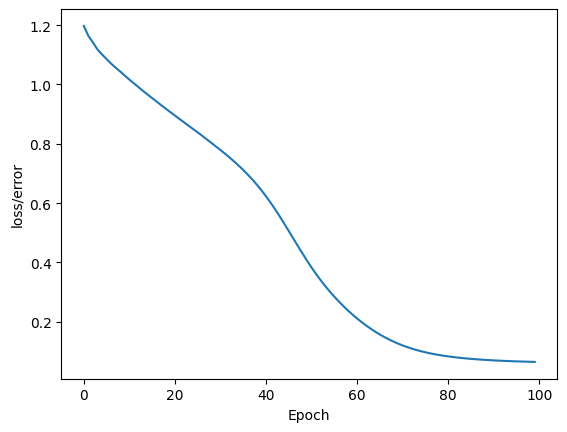

In [39]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")